In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw12.ok')

Assignment: Homework 12: Classification
OK, version v1.12.5



# Homework 12: Classification

**Reading**: 

* [Classification](https://www.inferentialthinking.com/chapters/17/classification.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 12 is due **Thursday, 5/2 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 5/1 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from client.api.notebook import Notebook
ok = Notebook('hw12.ok')

Assignment: Homework 12: Classification
OK, version v1.12.5



## 1. Reading Sign Language with Classification


Brazilian Sign Language is a visual language used primarily by Brazilians who are deaf.  It is more commonly called Libras.  People who communicate with visual language are called *signers*.  Here is a video of someone signing in Libras:

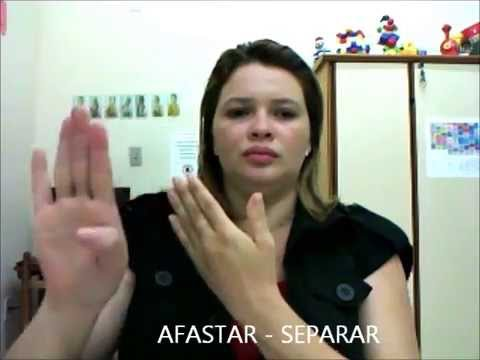

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("mhIcuMZmyWM")

Programs like Siri or Google Now begin the process of understanding human speech by classifying short clips of raw sound into basic categories called *phones*.  For example, the recorded sound of someone saying the word "robot" might be broken down into several phones: "rrr", "oh", "buh", "aah", and "tuh".  Phones are then grouped together into further categories like words ("robot") and sentences ("I, for one, welcome our new robot overlords") that carry more meaning.

A visual language like Libras has an analogous structure.  Instead of phones, each word is made up of several *hand movements*.  As a first step in interpreting Libras, we can break down a video clip into small segments, each containing a single hand movement.  The task is then to figure out what hand movement each segment represents.

We can do that with classification!

The [data](https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.names) in this exercise come from Dias, Peres, and Biscaro, researchers at the University of Sao Paulo in Brazil.  They identified 15 distinct hand movements in Libras (probably an oversimplification, but a useful one) and captured short videos of signers making those hand movements.  (You can read more about their work [here](http://ieeexplore.ieee.org/Xplore/login.jsp?url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F5161636%2F5178557%2F05178917.pdf&authDecision=-203). The paper is gated, so you will need to use your institution's Wi-Fi or VPN to access it.)

For each video, they chose 45 still frames from the video and identified the location (in horizontal and vertical coordinates) of the signer's hand in each frame.  Since there are two coordinates for each frame, this gives us a total of 90 numbers summarizing how a hand moved in each video.  Those 90 numbers will be our *attributes*.

Each video is *labeled* with the kind of hand movement the signer was making in it.  Each label is one of 15 strings like "horizontal swing" or "vertical zigzag".

For simplicity, we're going to focus on distinguishing between just two kinds of movements: "horizontal straight-line" and "vertical straight-line".  We took the Sao Paulo researchers' original dataset, which was quite small, and used some simple techniques to create a much larger synthetic dataset.

These data are in the file `movements.csv`.  Run the next cell to load it.

In [4]:
movements = Table.read_table("movements.csv")
movements.take(np.arange(5))

Frame 1 x,Frame 1 y,Frame 2 x,Frame 2 y,Frame 3 x,Frame 3 y,Frame 4 x,Frame 4 y,Frame 5 x,Frame 5 y,Frame 6 x,Frame 6 y,Frame 7 x,Frame 7 y,Frame 8 x,Frame 8 y,Frame 9 x,Frame 9 y,Frame 10 x,Frame 10 y,Frame 11 x,Frame 11 y,Frame 12 x,Frame 12 y,Frame 13 x,Frame 13 y,Frame 14 x,Frame 14 y,Frame 15 x,Frame 15 y,Frame 16 x,Frame 16 y,Frame 17 x,Frame 17 y,Frame 18 x,Frame 18 y,Frame 19 x,Frame 19 y,Frame 20 x,Frame 20 y,Frame 21 x,Frame 21 y,Frame 22 x,Frame 22 y,Frame 23 x,Frame 23 y,Frame 24 x,Frame 24 y,Frame 25 x,Frame 25 y,Frame 26 x,Frame 26 y,Frame 27 x,Frame 27 y,Frame 28 x,Frame 28 y,Frame 29 x,Frame 29 y,Frame 30 x,Frame 30 y,Frame 31 x,Frame 31 y,Frame 32 x,Frame 32 y,Frame 33 x,Frame 33 y,Frame 34 x,Frame 34 y,Frame 35 x,Frame 35 y,Frame 36 x,Frame 36 y,Frame 37 x,Frame 37 y,Frame 38 x,Frame 38 y,Frame 39 x,Frame 39 y,Frame 40 x,Frame 40 y,Frame 41 x,Frame 41 y,Frame 42 x,Frame 42 y,Frame 43 x,Frame 43 y,Frame 44 x,Frame 44 y,Frame 45 x,Frame 45 y,Movement type
0.522768,0.769731,0.536186,0.749446,0.518625,0.757197,0.517752,0.756847,0.504951,0.726008,0.50008,0.712113,0.463555,0.712355,0.49873,0.736872,0.51472,0.754353,0.517935,0.748163,0.5082,0.734278,0.50004,0.726941,0.49291,0.71189,0.480587,0.715755,0.476772,0.723531,0.504372,0.717318,0.46351,0.70031,0.463217,0.693279,0.474777,0.722122,0.512079,0.73267,0.506785,0.731242,0.497417,0.723703,0.505879,0.726615,0.51537,0.741874,0.544376,0.741177,0.51367,0.714379,0.509508,0.715222,0.519559,0.704945,0.511828,0.69361,0.511366,0.685024,0.510194,0.686122,0.518486,0.694125,0.524232,0.68817,0.531254,0.672905,0.530833,0.672029,0.521013,0.621037,0.481328,0.586983,0.450996,0.576725,0.474634,0.585757,0.465209,0.572517,0.430172,0.547155,0.429693,0.531896,0.415799,0.516734,0.40249,0.528653,0.413692,0.510434,vertical straight-line
0.179546,0.658986,0.177132,0.656834,0.168157,0.664803,0.176407,0.654713,0.167577,0.635559,0.138276,0.633621,0.143817,0.633303,0.154967,0.643993,0.169151,0.646888,0.138409,0.62286,0.141052,0.638818,0.129957,0.644284,0.141763,0.643459,0.127024,0.641122,0.133745,0.63458,0.114496,0.632741,0.0891234,0.631917,0.0836099,0.630901,0.07445,0.621396,0.072605,0.635247,0.0506362,0.620064,0.0467104,0.62067,0.0531715,0.645212,0.0374171,0.634352,0.0182681,0.61547,-0.0197023,0.6088,-0.027299,0.605641,-0.0482872,0.594468,-0.0640002,0.588416,-0.0565593,0.582703,-0.0881633,0.586423,-0.0929613,0.600561,-0.0928198,0.609785,-0.107121,0.624372,-0.115449,0.613028,-0.140709,0.614448,-0.148999,0.607538,-0.179288,0.582983,-0.196426,0.612175,-0.195264,0.580151,-0.230368,0.577835,-0.250168,0.550737,-0.274717,0.571828,-0.258795,0.590663,-0.256045,0.578798,horizontal straight-line
0.805813,0.651365,0.832204,0.666023,0.834636,0.645757,0.826685,0.645685,0.816671,0.625701,0.810289,0.637001,0.819373,0.635922,0.827567,0.637587,0.813763,0.645346,0.824472,0.632012,0.82673,0.643524,0.817462,0.638418,0.804468,0.63604,0.830122,0.652033,0.828967,0.658297,0.850648,0.678696,0.845375,0.679893,0.858148,0.677961,0.852067,0.673301,0.849921,0.668893,0.84142,0.681652,0.869216,0.68519,0.857929,0.69222,0.868462,0.683252,0.843773,0.668541,0.848835,0.674522,0.843266,0.663946,0.830001,0.655817,0.825753,0.654858,0.822624,0.660058,0.818284,0.643763,0.796939,0.62913,0.789691,0.61749,0.772315,0.606656,0.773609,0.605172,0.76006,0.579637,0.728993,0.576794,0.726034,0.584777,0.705394,0.573393,0.693345,0.579456,0.693249,0.581378,0.684606,0.576406,0.670061,0.566151,0.642557,0.569876,0.629915,0.561387,horizontal straight-line
0.83942,0.564511,0.853031,0.560031,0.845024,0.549989,0.824814,0.546812,0.821869,0.5462,0.820898,0.536278,0.800887,0.525634,0.801667,0.542531,0.806793,0.553656,0.799924,0.576862,0.810348,0.571102,0.801704,0.57294,0.773529,0.561476,0.772628,0.565349,0.773298,0.566374,0.727042,0.553929,0.723279,0.579006,0.731698,0.593158,0.727945,0.606501,0.72577,0.644594,0.721218,0.642742,0.718306,0.65346,0.702917,0.676261,0.724201,0.707004,0.711995,0.708004,0.703505,0.708526,0.697355,0.711636,0.674235,0.737123,0.68839,0.

The cell below displays movements graphically.  Run it and use the slider to answer the next question.

In [5]:
# Just run this cell and use the slider it produces.
def display_whole_movement(row_idx):
    num_frames = int((movements.num_columns-1)/2)
    row = np.array(movements.drop("Movement type").row(row_idx))
    xs = row[np.arange(0, 2*num_frames, 2)]
    ys = row[np.arange(1, 2*num_frames, 2)]
    plt.figure(figsize=(5,5))
    plt.plot(xs, ys, c="gold")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-.5, 1.5)
    plt.ylim(-.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')

def display_hand(example, frame, display_truth):
        time_idx = frame-1
        display_whole_movement(example)
        x = movements.column(2*time_idx).item(example)
        y = movements.column(2*time_idx+1).item(example)
        plt.annotate(
            "frame {:d}".format(frame),
            xy=(x, y), xytext=(-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            color='white',
            bbox = {'boxstyle': 'round,pad=0.5', 'fc': 'black', 'alpha':.4},
            arrowprops = {'arrowstyle': '->', 'connectionstyle':'arc3,rad=0', 'color': 'black'})
        plt.scatter(x, y, c="black", zorder=10)
        plt.title("Hand positions for movement {:d}{}".format(example, "\n(True class: {})".format(movements.column("Movement type").item(example)) if display_truth else ""))

def animate_movement():
    interact(
        display_hand,
        example=widgets.BoundedIntText(min=0, max=movements.num_rows-1, value=0, msg_throttle=1),
        frame=widgets.IntSlider(min=1, max=int((movements.num_columns-1)/2), step=1, value=1, msg_throttle=1),
        display_truth=fixed(False))

animate_movement()

interactive(children=(BoundedIntText(value=0, description='example', max=959), IntSlider(value=1, description=…

#### Question 1

Before we move on, check your understanding of the dataset.  Judging by the plot, is the first movement example a vertical motion, or a horizontal motion? If it is hard to tell, does it seem more likely to be vertical or horizontal? This is the kind of question a classifier has to answer.  Find out the right answer by looking at the `Movement type` column.  

Assign `first_movement` to `1` if the movement was vertical, or `2` if the movement was horizontal.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [6]:
first_movement = 1

In [7]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Splitting the dataset
We'll do 2 different kinds of things with the `movements` dataset:
1. We'll build a classifier that uses the movements with known labels as examples to classify similar movements.  This is called *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build.

For reasons discussed in lecture and the textbook, we want to use separate datasets for these two purposes.  So we split up our one dataset into two.

#### Question 2

Create a table called `train_movements` and another table called `test_movements`.  `train_movements` should include the first $\frac{11}{16}$th of the rows in `movements` (rounded to the nearest integer), and `test_movements` should include the remaining $\frac{5}{16}$th. 

Note that we do **not** mean the first 11 rows for the training test and rows 12-16 for the test set. We mean the first $\frac{11}{16} = 68.75$% of the table should be for the the trianing set, and the rest should be for the test set. 

*Hint:* Use the table method `take`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [9]:
training_proportion = 11/16
num_movements = movements.num_rows
num_train = int(round(num_movements * training_proportion))

train_movements = movements.take(np.arange(num_train))
test_movements = movements.take(np.arange(num_train, num_movements))

print("Training set:\t",   train_movements.num_rows, "examples")
print("Test set:\t",       test_movements.num_rows, "examples")

Training set:	 660 examples
Test set:	 300 examples


In [10]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Using only 2 features
First let's see how well we can distinguish two movements (a vertical line and a horizontal line) using the hand position from just a single frame (without the other 44).

#### Question 3

Make a table called `train_two_features` with only 3 columns: the first frame’s x coordinate and first frame’s y coordinate (which are our chosen features), as well as the movement type. Use only the examples in train_movements. 

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [11]:
train_two_features = train_movements.select("Frame 1 x", "Frame 1 y", "Movement type")
train_two_features

Frame 1 x,Frame 1 y,Movement type
0.522768,0.769731,vertical straight-line
0.179546,0.658986,horizontal straight-line
0.805813,0.651365,horizontal straight-line
0.83942,0.564511,horizontal straight-line
0.5504,0.724639,vertical straight-line
0.817345,0.577487,horizontal straight-line
0.694355,0.705304,vertical straight-line
0.830036,0.376533,horizontal straight-line
0.678359,0.865604,vertical straight-line
0.713982,0.538962,horizontal straight-line


In [12]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now we want to make a scatter plot of the frame coordinates, where the dots for horizontal straight-line movements have one color and the dots for vertical straight-line movements have another color.  Here is a scatter plot without colors:

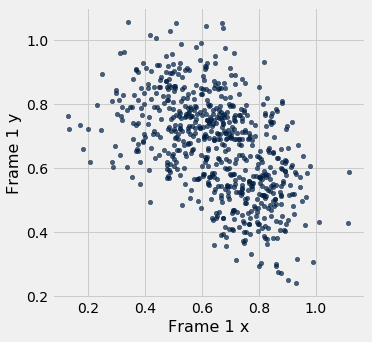

In [13]:
train_two_features.scatter("Frame 1 x", "Frame 1 y")

This isn't useful because we don't know which dots are which movement type.  We need to tell Python how to color the dots.  Let's use gold for vertical and blue for horizontal movements.

`scatter` takes an extra argument called `colors` that's the name of an extra column in the table that contains colors (strings like "red" or "orange") for each row.  So we need to create a table like this:

|Frame 1 x|Frame 1 y|Movement type|Color|
|-|-|-|-|
|0.522768|0.769731|vertical straight-line|gold|
|0.179546|0.658986|horizontal straight-line|blue|
|...|...|...|...|

<div class="hide">\pagebreak</div>

#### Question 4

In the cell below, create a table named `with_colors`.  It should have the same columns as the example table above, but with a row for each row in `train_two_features`. Then, create a scatter plot of your data.

<!--
BEGIN QUESTION
name: q1_4
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

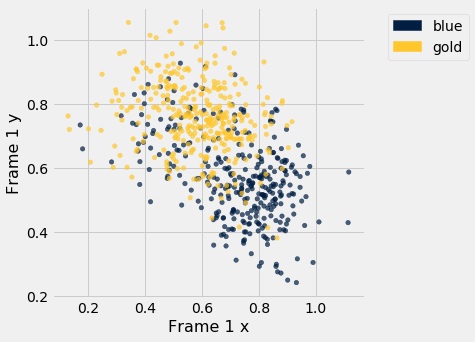

In [16]:
# You should find the following table useful.
type_to_color = Table().with_columns(
    "Movement type", make_array("vertical straight-line", "horizontal straight-line"),
    "Color",         make_array("gold",                   "blue"))

with_colors = train_two_features.join('Movement type', type_to_color)
with_colors.scatter("Frame 1 x", "Frame 1 y", colors="Color")

<div class="hide">\pagebreak</div>

#### Question 5

Based on the scatter plot, how well will a nearest-neighbor classifier based on only these 2 features (the x- and y-coordinates of the hand position in the first frame) work?  Will it:

1. distinguish almost perfectly between vertical and horizontal movements;
2. distinguish somewhat well between vertical and horizontal movements, getting some correct but missing a substantial proportion; or
3. be basically useless in distinguishing between vertical and horizontal movements?

Why?

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

I believe it will distinguish somewhat well between vertical and horizontal movements but miss a substantial proportion (2) because based on the scatter plot, most vertical movements are in the upper left part of the graph while the horizontal ones are in the lower right but there is also substantial intermingling within the blue and gold dots.

## 2. Classification Potpourri


Throughout this question, we will aim to discuss some conceptual nuances of classification that often get overlooked when we're focused only on improving our accuracy and building the best classifier possible. 

#### Question 1

What is the point of a test-set? Should we use our test set to find the best possible number of neighbors for a k-NN classifer? Explain. 

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

The test set is to test our classifier. We should use our test set to find the best possible number of neighbors for a k-NN classification because if we use our training set, we will find that the first nearest neighbor will be the best because it is already in the training set. 

#### Question 2
You have a large dataset which contains three columns. The first two are attributes of the person that might be predictive of whether or not someone has breast-cancer, and the third column indicates whether they have it or not. 99% of the table contains examples of people who do not have breast cancer. 

Imagine you are trying to use a k-NN classifier to use the first two columns to predict whether or not someone has breast cancer. You split your training and test set up as necessary, you develop a 7-NN classifier, and you notice your classifier predicts every point in the test set to be a person who does not have breast cancer. Is there a problem with your classifier? Explain this phenomenon.   

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

Because the training set is mostly composed of people who do not breast cancer, the classifier learns from the training set so when we test our points, the classifier will most likely predict that the person does not have breast cancer. 

#### Question 3
You have a training set with data on the characteristics of 35 examples of fruit. 25 of the data points are apples, and the remaining 10 are oranges.

You decide to make a k-NN classifier. Assign `k_upper_bound` to the smallest possible k such that the classifier will predict Apple for every point, regardless of how the data is spread out.

Imagine that ties are broken at random for even values of k, so there is no guarantee of what will be picked if there is a tie. 

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->


In [17]:
k_upper_bound = 21

In [18]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



If you enjoyed classification and want to learn more about the nuances behind it, make sure to continue your data science education by taking Data 100!

## Final-Semester Survey


You can find the end of semester feedback form [here](https://forms.gle/pUkV8Kmc8LAUTm6R9) and the official Berkeley Course Evaluations [here](https://course-evaluations.berkeley.edu). Please take some time to fill the survey out! Data 8 is still a relatively new class, and your feedback helps the class get better every semester!

As incentive, if 80% of the course fills this feedback form **and** the official Berkeley Course Evaluations for this course, everyone will receive two points of extra credit!

## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [19]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw12.ipynb'.
Submit... 100% complete
Submission successful for user: mingxiuhui@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/hw12/submissions/JyRZzg



In [20]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

Finished running all tests.
